# Ejercicio N° 1 de CNN

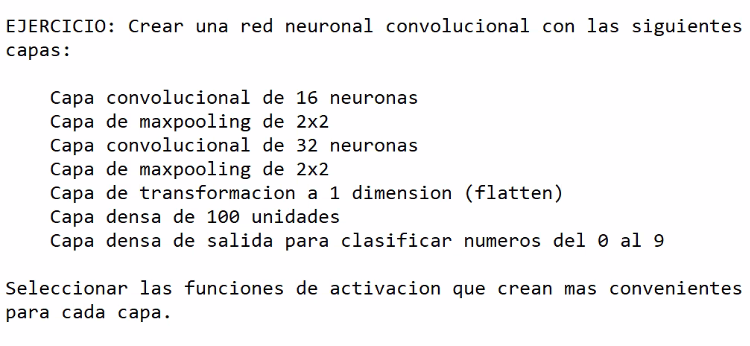

# Vamos Crear una Capa Densa y una Convolucional para Comparar

In [63]:
import tensorflow as tf  # Importa TensorFlow, un framework de aprendizaje automático.
from keras.datasets import mnist  # Importa el conjunto de datos MNIST desde Keras.
from keras import layers, models  # Importa los módulos layers y models de Keras.
import matplotlib.pyplot as plt  # Importa Matplotlib para la visualización de datos.
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  # Carga el conjunto de datos MNIST en variables de entrenamiento y prueba.

train_images = train_images.reshape((60000, 28, 28))  # Reorganiza las imágenes de entrenamiento a la forma deseada.
test_images = test_images.reshape((10000, 28, 28))  # Reorganiza las imágenes de prueba a la forma deseada.
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normaliza los valores de píxeles de las imágenes.

################################################################################################

# MODELO 1 (Densa)
model_1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Capa de aplanamiento de la imagen.
    layers.Dense(units=50, activation='relu'),  # Capa densa con activación ReLU.
    layers.Dense(units=50, activation='relu'),  # Capa densa con activación ReLU.
    layers.Dense(units=10, activation='softmax')  # Capa densa con activación Softmax.
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compila el modelo con el optimizador Adam y la pérdida categórica escasa.
model_1.fit(train_images, train_labels, epochs=5)  # Entrena el modelo durante 5 épocas.

print("")

# MODELO 2 (Convolucional)
model_2 = models.Sequential([
    layers.Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'),  # Capa de convolución con activación ReLU.
    layers.MaxPool2D(2, 2),  # Capa de reducción de tamaño máxima.
    layers.Conv2D(32, (3, 3), activation='relu'),  # Capa de convolución con activación ReLU.
    layers.MaxPool2D(2, 2),  # Capa de reducción de tamaño máxima.
    layers.Flatten(),  # Capa de aplanamiento.
    layers.Dense(units=100, activation='relu'),  # Capa densa con activación ReLU.
    layers.Dense(units=10, activation='sigmoid')  # Capa densa con activación Sigmoide.
])

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compila el modelo con el optimizador Adam y la pérdida categórica escasa.
model_2.fit(train_images, train_labels, epochs=5)  # Entrena el modelo durante 5 épocas.

################################################################################################

print("")

test_loss, test_accuracy = model_1.evaluate(test_images, test_labels)  # Evalúa el modelo 1 en los datos de prueba y obtiene pérdida y precisión.
print(f"Loss: {test_loss}")  # Imprime la pérdida del modelo 1.
print(f"Accuracy: {test_accuracy}")  # Imprime la precisión del modelo 1.
print("")

test_loss, test_accuracy = model_2.evaluate(test_images, test_labels)  # Evalúa el modelo 2 en los datos de prueba y obtiene pérdida y precisión.
print(f"Loss: {test_loss}")  # Imprime la pérdida del modelo 2.
print(f"Accuracy: {test_accuracy}")  # Imprime la precisión del modelo 2.
print("")


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3022 - accuracy: 0.9109
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1433 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1086 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0886 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0739 - accuracy: 0.9771

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1615 - accuracy: 0.9510
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0499 - accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0361 - accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0250 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.021

# Visualizo una Array de 2 x 10 de MNIST

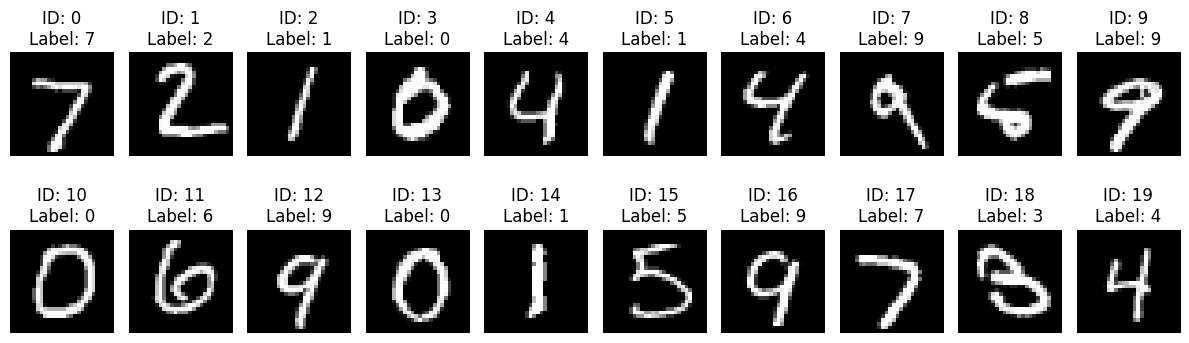

In [64]:
# Crea una figura de 2x10 subplots
fig, axs = plt.subplots(2, 10, figsize=(12, 4))

# Rellena los subplots con imágenes, etiquetas e IDs
for i in range(2):
    for j in range(10):
        # Calcula el índice correspondiente en función de la fila y la columna
        idx = i * 10 + j

        # Obtiene la imagen, su etiqueta y su ID correspondiente
        imagen = test_images[idx]
        etiqueta = test_labels[idx]
        id_imagen = idx

        # Muestra la imagen en el subplot actual
        axs[i, j].imshow(imagen, cmap='gray')
        axs[i, j].set_title(f'ID: {id_imagen}\nLabel: {etiqueta}')
        axs[i, j].axis('off')  # Desactiva los ejes

plt.tight_layout()
plt.show()

# Vamos a Predecir y Comparar, una Imagen con Capa Densa y Convolucional

# Comparación 1 de 2

In [87]:
# Index de la Imagen a Predecir

index = 7

1/1 [==============================] - 0s 18ms/step


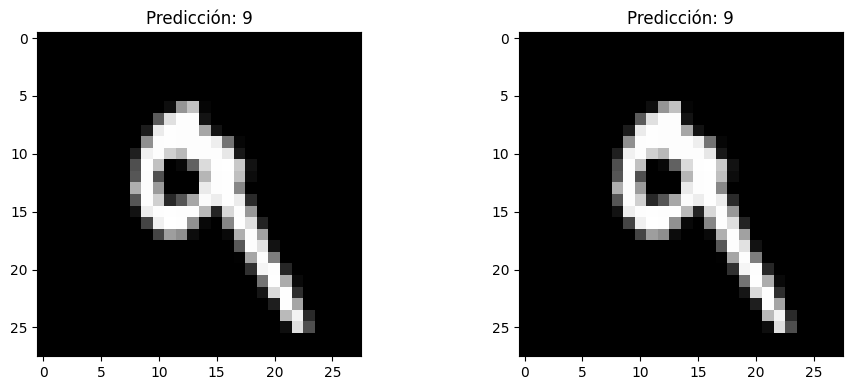

In [88]:
# Crear una figura de 1 fila por 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

image_to_predict = test_images[index].reshape(1, 28, 28)
predict_label = model_1.predict(image_to_predict)
predict_digit = tf.argmax(predict_label, axis = 1)[0]

# Primer gráfico en la primera columna
axs[0].imshow(test_images[index].reshape(28, 28), cmap = 'gray')
axs[0].set_title(f"Predicción: {predict_digit}")

#######################################################################

image_to_predict = test_images[index].reshape(1, 28, 28)
predict_label = model_2.predict(image_to_predict)
predict_digit = tf.argmax(predict_label, axis = 1)[0]

# Segundo gráfico en la segunda columna
axs[1].imshow(test_images[index].reshape(28, 28), cmap = 'gray')
axs[1].set_title(f"Predicción: {predict_digit}")

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Comparación 2 de 2

In [89]:
# Index de la Imagen a Predecir

index = 18

1/1 [==============================] - 0s 18ms/step


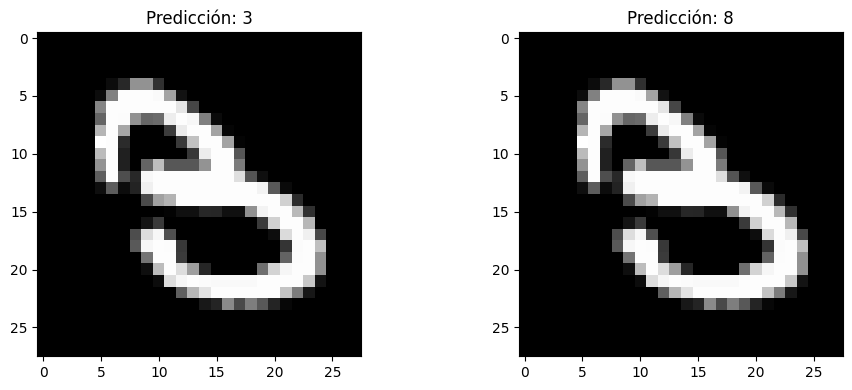

In [90]:
# Crear una figura de 1 fila por 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

image_to_predict = test_images[index].reshape(1, 28, 28)
predict_label = model_1.predict(image_to_predict)
predict_digit = tf.argmax(predict_label, axis = 1)[0]

# Primer gráfico en la primera columna
axs[0].imshow(test_images[index].reshape(28, 28), cmap = 'gray')
axs[0].set_title(f"Predicción: {predict_digit}")

#######################################################################

image_to_predict = test_images[index].reshape(1, 28, 28)
predict_label = model_2.predict(image_to_predict)
predict_digit = tf.argmax(predict_label, axis = 1)[0]

# Segundo gráfico en la segunda columna
axs[1].imshow(test_images[index].reshape(28, 28), cmap = 'gray')
axs[1].set_title(f"Predicción: {predict_digit}")

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()